In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
df = pd.read_csv(r"C:\Users\singh\Downloads\HRDataset_v14.csv")

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [4]:
import warnings

# To ignore all warnings
warnings.filterwarnings('ignore')

In [5]:
df.head(10)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,0,19,Production Technician I,MA,1844,05/22/77,F,Single,US Citizen,No,White,1/9/2012,NaN,N/A-StillEmployed,Active,Production,Amy Dunn,11.0,LinkedIn,Exceeds,5.00,5,0,1/7/2019,0,15
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,0,24,Software Engineer,MA,2110,05/24/79,F,Single,US Citizen,No,White,11/10/2014,NaN,N/A-StillEmployed,Active,Software Engineering,Alex Sweetwater,10.0,LinkedIn,Fully Meets,3.04,3,4,1/2/2019,0,19
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,0,19,Production Technician I,MA,2199,02/18/83,M,Widowed,US Citizen,No,White,9/30/2013,NaN,N/A-StillEmployed,Active,Production,Ketsia Liebig,19.0,Employee Referral,Fully Meets,5.00,4,0,2/25/2019,0,19
8,"Bachiochi, Linda",10114,0,0,0,3,5,3,1,47837,0,19,Production Technician I,MA,1902,02/11/70,F,Single,US Citizen,No,Black or African American,7/6/2009,NaN,N/A-StillEmployed,Active,Production,Brannon Miller,12.0,Diversity Job Fair,Fully Meets,4.46,3,0,1/25/2019,0,4
9,"Bacong, Alejandro",10250,0,2,1,1,3,3,0,50178,0,14,IT Support,MA,1886,01/07/88,M,Divorced,US Citizen,No,White,1/5/2015,NaN,N/A-StillEmployed,Active,IT/IS,Peter Monroe,7.0,Indeed,Fully Meets,5.00,5,6,2/18/2019,0,16


In [6]:
def get_df_info(df):
    print("\n\033[1mShape of DataFrame:\033[0m ", df.shape)
    print("\n\033[1mColumns in DataFrame:\033[0m ", df.columns.to_list())
    print("\n\033[1mData types of columns:\033[0m\n", df.dtypes)
    
    print("\n\033[1mInformation about DataFrame:\033[0m")
    df.info()
    
    print("\n\033[1mNumber of unique values in each column:\033[0m")
    for col in df.columns:
        print(f"\033[1m{col}\033[0m: {df[col].nunique()}")
        
    print("\n\033[1mNull values in columns:\033[0m")
    null_counts = df.isnull().sum()
    null_columns = null_counts[null_counts > 0]
    if len(null_columns) > 0:
        for col, count in null_columns.items():
            print(f"\033[1m{col}\033[0m: {count}")
    else:
        print("There are no null values in the DataFrame.")
    
    print("\n\033[1mNumber of duplicate rows:\033[0m ", df.duplicated().sum())
    
    print("\n\033[1mDescriptive statistics of DataFrame:\033[0m\n",)
    return df.describe().transpose()

# Call the function
get_df_info(df)


Shape of DataFrame:  (311, 36)

Columns in DataFrame:  ['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource', 'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences']

Data types of columns:
 Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                        

,count,mean,std,min,25%,50%,75%,max
EmpID,311.0,10156.000000,89.922189,10001.00,10078.50,10156.00,10233.5,10311.0
MarriedID,311.0,0.398714,0.490423,0.00,0.00,0.00,1.0,1.0
MaritalStatusID,311.0,0.810289,0.943239,0.00,0.00,1.00,1.0,4.0
GenderID,311.0,0.434084,0.496435,0.00,0.00,0.00,1.0,1.0
EmpStatusID,311.0,2.392283,1.794383,1.00,1.00,1.00,5.0,5.0
DeptID,311.0,4.610932,1.083487,1.00,5.00,5.00,5.0,6.0
PerfScoreID,311.0,2.977492,0.587072,1.00,3.00,3.00,3.0,4.0
FromDiversityJobFairID,311.0,0.093248,0.291248,0.00,0.00,0.00,0.0,1.0
Salary,311.0,69020.684887,25156.636930,45046.00,55501.50,62810.00,72036.0,250000.0
Termd,311.0,0.334405,0.472542,0.00,0.00,0.00,1.0,1.0


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

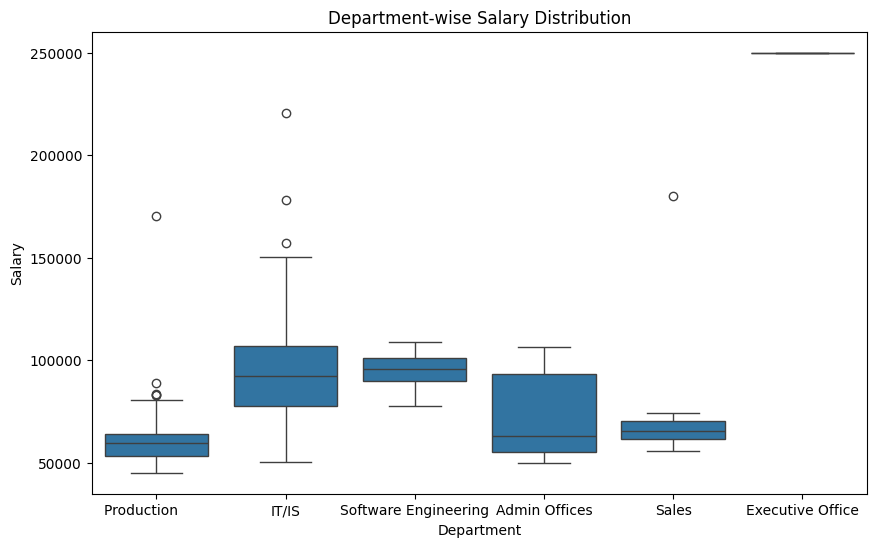

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Department", y="Salary", data=df)
plt.title("Department-wise Salary Distribution")
plt.xlabel("Department")
plt.ylabel("Salary")
plt.show()

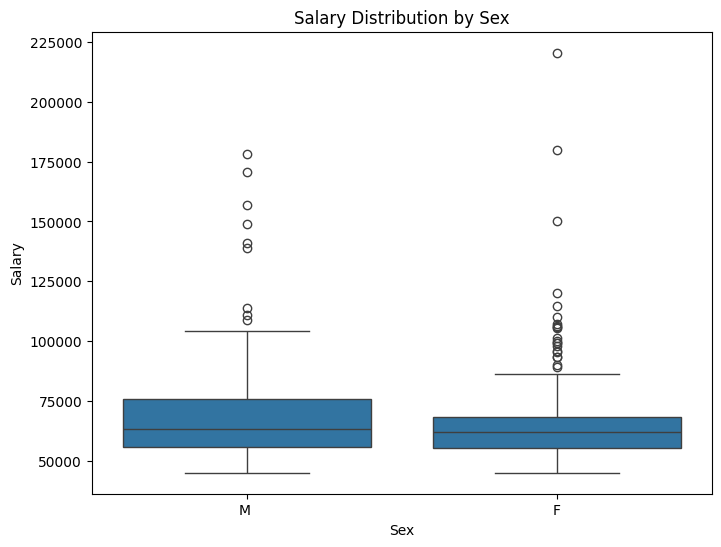

In [9]:
# Salary Distribution by Sex
plt.figure(figsize=(8, 6))
sns.boxplot(x="Sex", y="Salary", data=df[df["Department"]!= "Executive Office"])
plt.title("Salary Distribution by Sex")
plt.xlabel("Sex")
plt.ylabel("Salary")
plt.show()

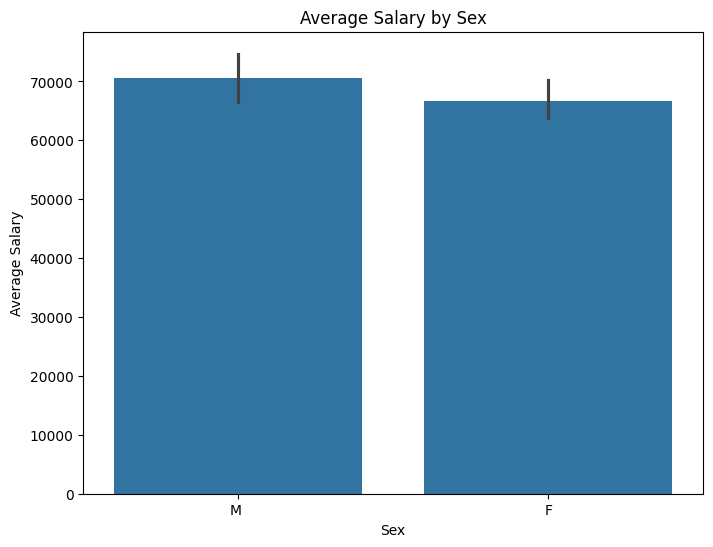

In [10]:
# Average Salary by Sex
plt.figure(figsize=(8, 6))
sns.barplot(x="Sex", y="Salary", data=df[df["Department"]!= "Executive Office"], estimator=np.mean)
plt.title("Average Salary by Sex")
plt.xlabel("Sex")
plt.ylabel("Average Salary")
plt.show()

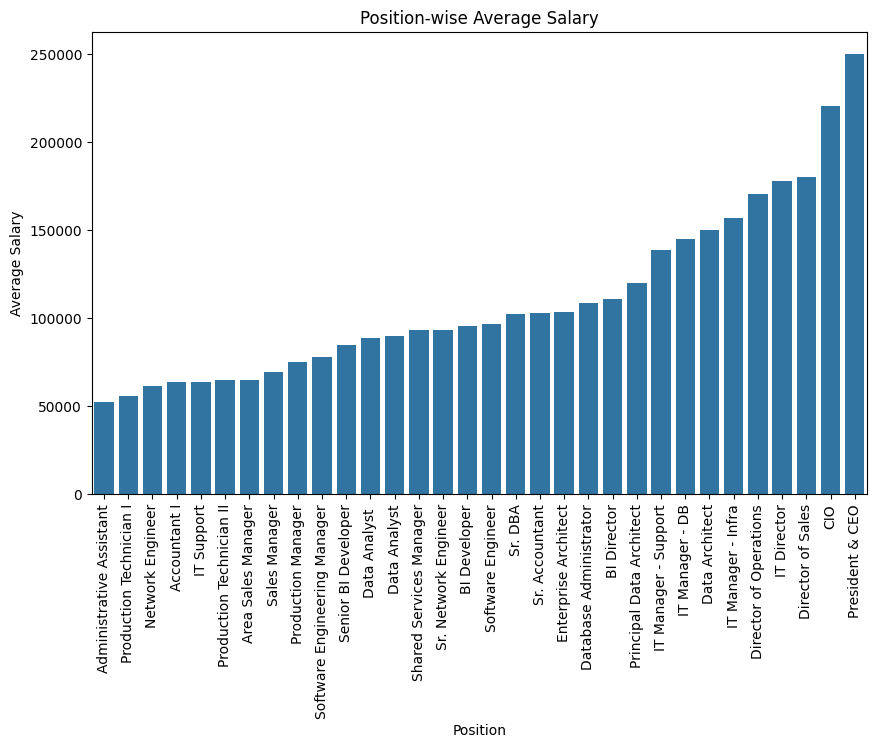

In [11]:
# Average Salary by Position
plt.figure(figsize=(10, 6))
data = df.groupby("Position")["Salary"].mean().reset_index()
data = data.sort_values("Salary")  # sort by average salary in ascending order
sns.barplot(x="Position", y="Salary", data=data)
plt.title("Position-wise Average Salary")
plt.xlabel("Position")
plt.ylabel("Average Salary")
plt.xticks(rotation=90)
plt.show()

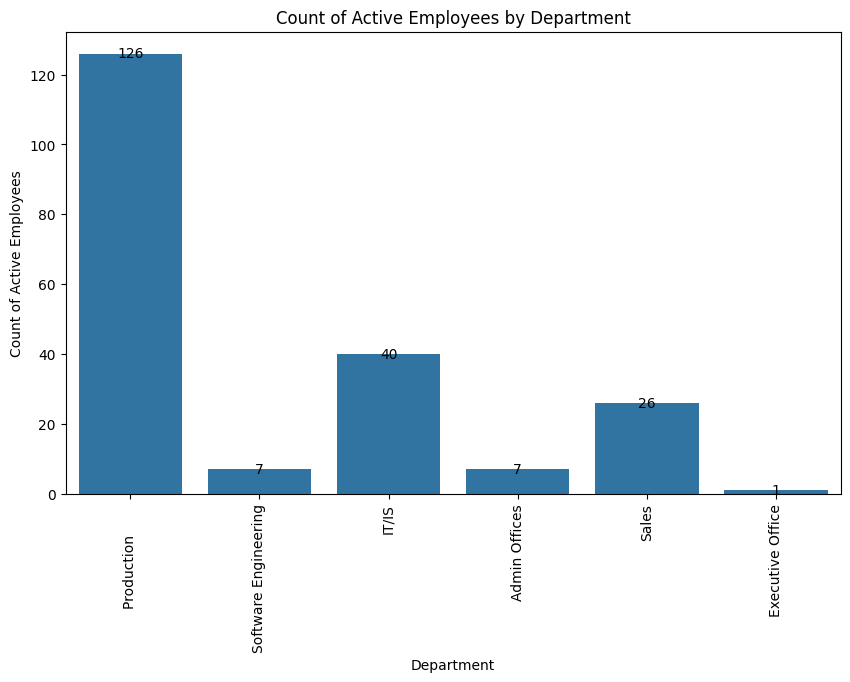

In [12]:
#Department wise Active Employees
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="Department", data=df[df['Termd'] == 0])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), f'{p.get_height():.0f}', ha='center', va='center')

plt.title("Count of Active Employees by Department")
plt.xlabel("Department")
plt.ylabel("Count of Active Employees")
plt.xticks(rotation=90)
plt.show()

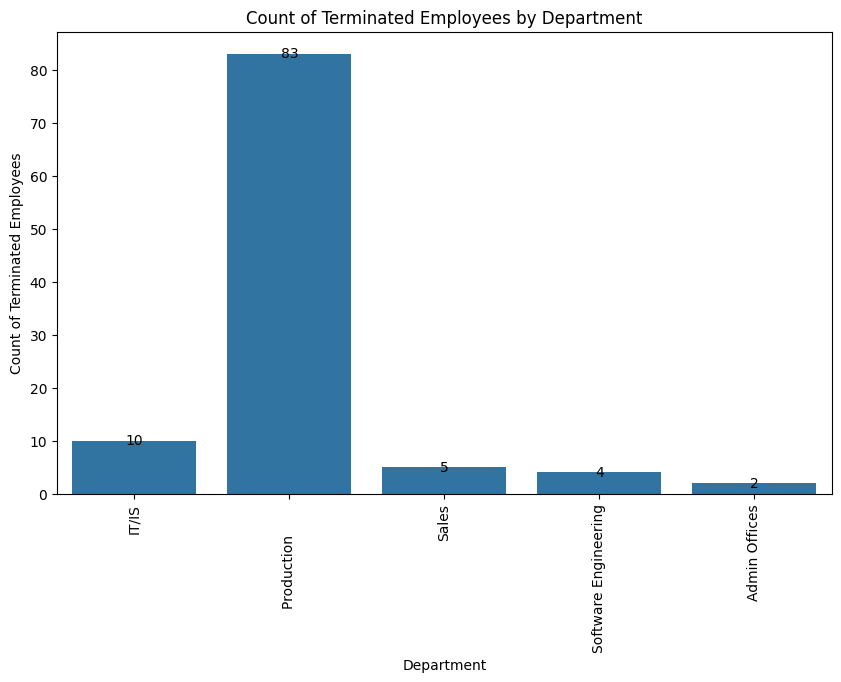

In [13]:
# Count of Terminated Employees by Department
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="Department", data=df[df['Termd'] == 1])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), f'{p.get_height():.0f}', ha='center', va='center')

plt.title("Count of Terminated Employees by Department")
plt.xlabel("Department")
plt.ylabel("Count of Terminated Employees")
plt.xticks(rotation=90)
plt.show()

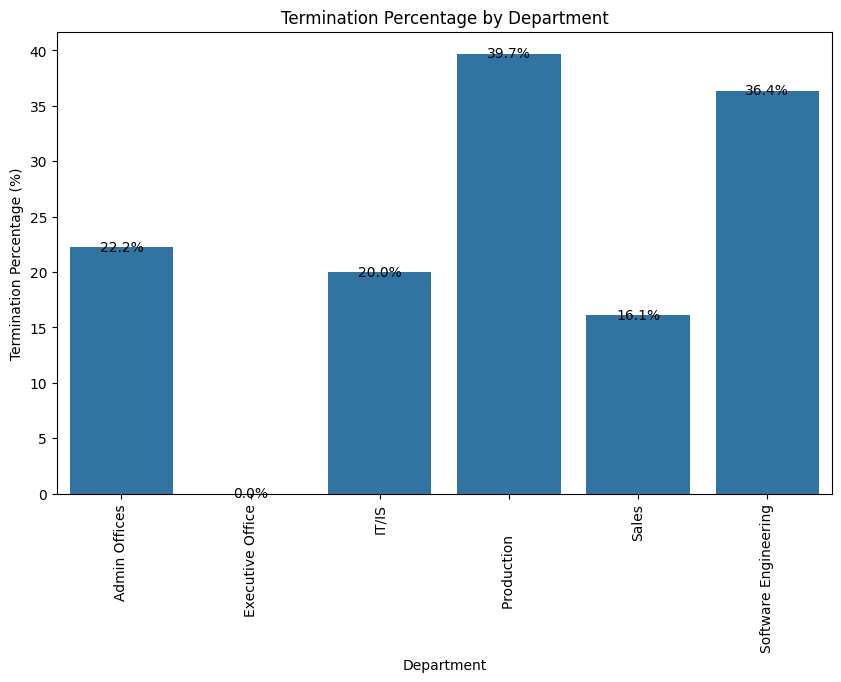

In [14]:
# Calculate termination percentage for each department
termination_percentage = df.groupby('Department')['Termd'].mean().reset_index()
termination_percentage.columns = ['Department', 'Termination Percentage']
termination_percentage['Termination Percentage'] = termination_percentage['Termination Percentage'] * 100

plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Department", y="Termination Percentage", data=termination_percentage)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), f'{p.get_height():.1f}%', ha='center', va='center')

plt.title("Termination Percentage by Department")
plt.xlabel("Department")
plt.ylabel("Termination Percentage (%)")
plt.xticks(rotation=90)
plt.show()

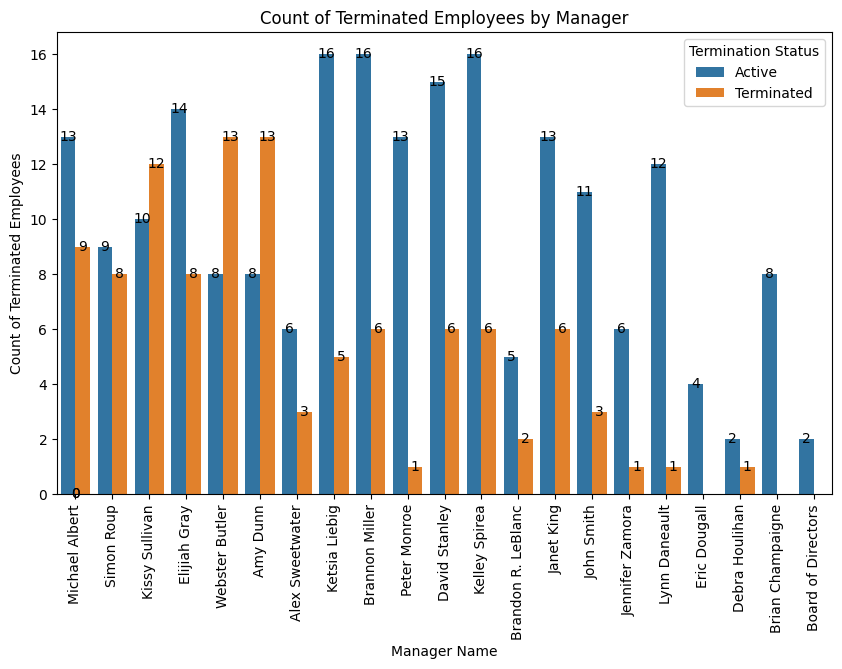

In [15]:
# Count of Terminated Employees by Manager
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="ManagerName", hue="Termd", data=df)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), f'{p.get_height():.0f}', ha='center', va='center')

plt.title("Count of Terminated Employees by Manager")
plt.xlabel("Manager Name")
plt.ylabel("Count of Terminated Employees")
plt.xticks(rotation=90)
plt.legend(title="Termination Status", labels=["Active", "Terminated"])
plt.show()

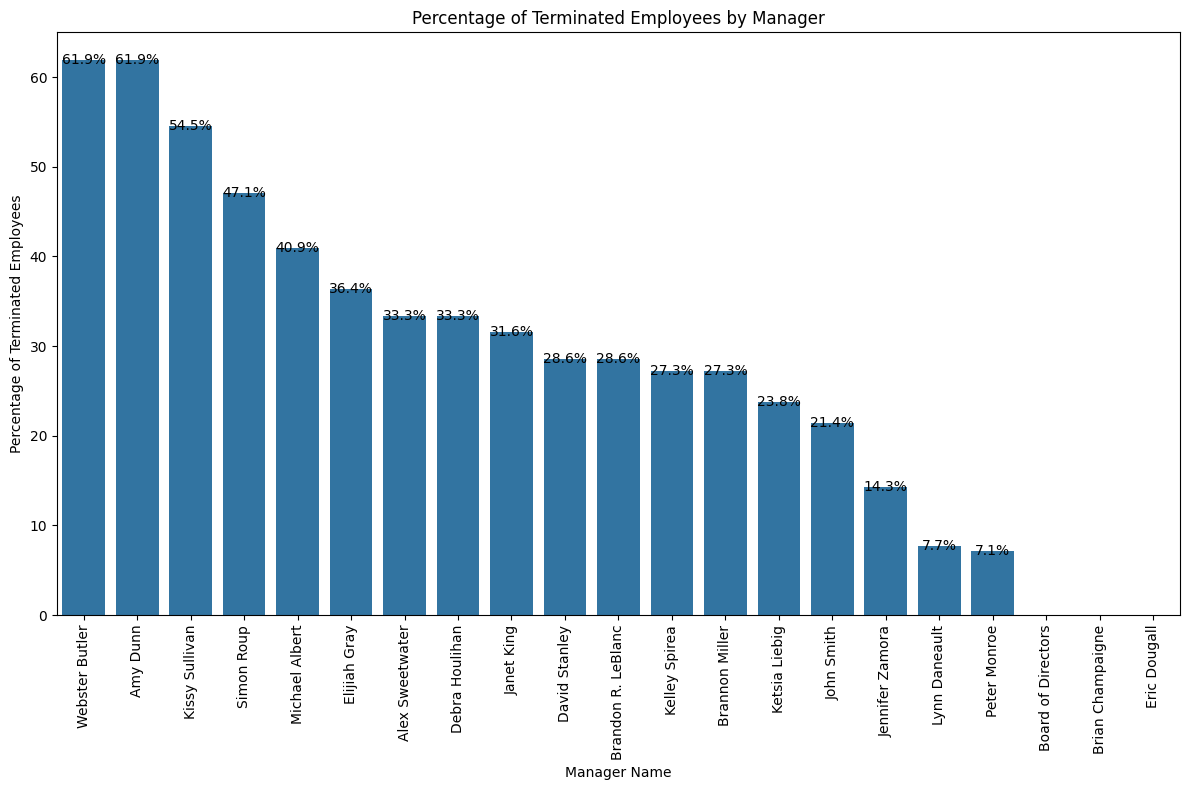

In [16]:
# Calculate the percentage of terminated employees for each manager
terminated_pct = df[df['Termd'] == 1].groupby("ManagerName").size().div(df.groupby("ManagerName").size()).mul(100).reset_index(name="Terminated Pct")

# Sort the dataframe by the percentage of terminated employees in descending order
terminated_pct = terminated_pct.sort_values("Terminated Pct", ascending=False)

plt.figure(figsize=(12, 8))  # Increased figure size to accommodate more spacing
ax = sns.barplot(x="ManagerName", y="Terminated Pct", data=terminated_pct, ci=None)  # Removed confidence intervals to reduce bar width

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), f'{p.get_height():.1f}%', ha='center', va='center')

plt.title("Percentage of Terminated Employees by Manager")
plt.xlabel("Manager Name")
plt.ylabel("Percentage of Terminated Employees")
plt.xticks(rotation=90)
plt.tight_layout()  # Added to ensure labels fit within the figure area
plt.show()

In [17]:
from scipy.stats import chi2_contingency

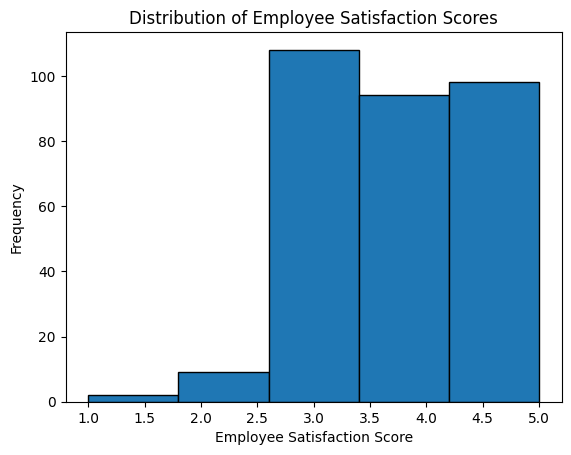

In [18]:
# Visualize the distribution of EmpSatisfaction scores
plt.hist(df['EmpSatisfaction'], bins=5, edgecolor='black')
plt.xlabel('Employee Satisfaction Score')
plt.ylabel('Frequency')
plt.title('Distribution of Employee Satisfaction Scores')
plt.show()


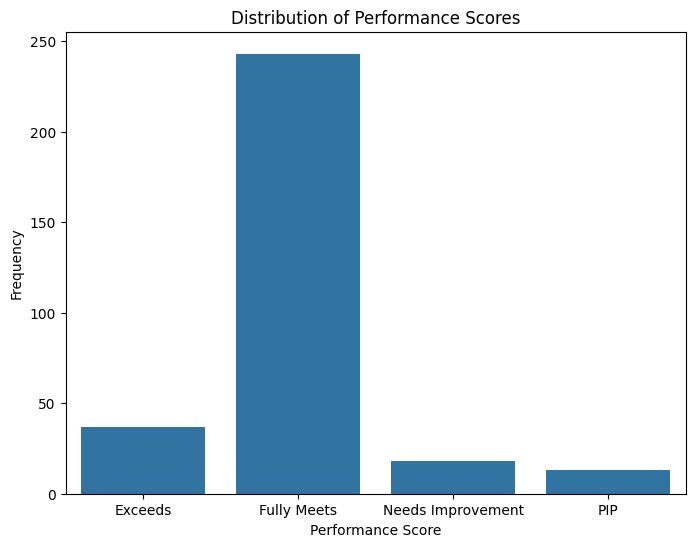

In [19]:
# Visualize the distribution of Performance Scores
plt.figure(figsize=(8, 6))
sns.countplot(x='PerformanceScore', data=df)
plt.xlabel('Performance Score')
plt.ylabel('Frequency')
plt.title('Distribution of Performance Scores')
plt.show()

In [20]:
# Create a contingency table to analyze the relationship between EmpSatisfaction and PerformanceScore
contingency_table = pd.crosstab(df['EmpSatisfaction'], df['PerformanceScore'])

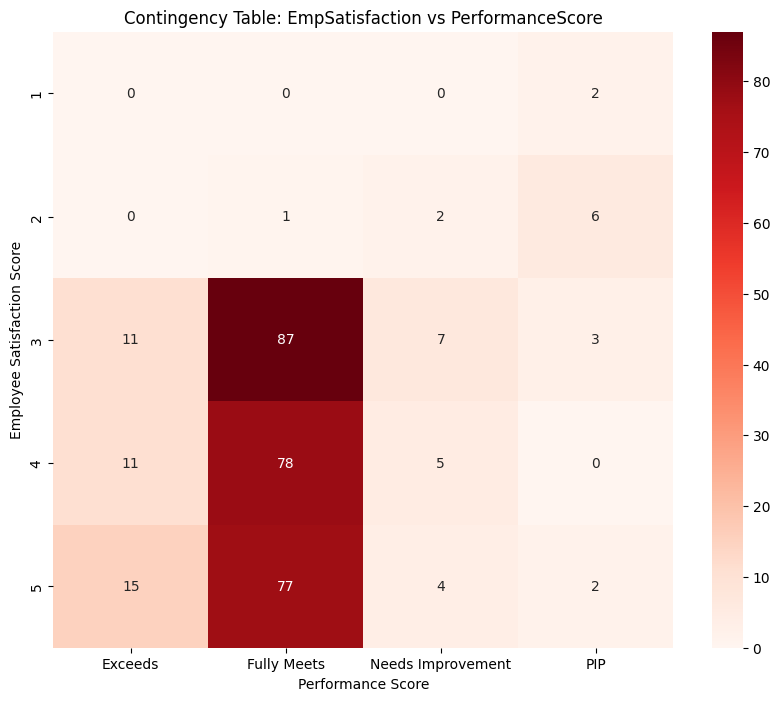

In [24]:
# Visualize the contingency table using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, cmap='Reds', fmt='d')
plt.xlabel('Performance Score')
plt.ylabel('Employee Satisfaction Score')
plt.title('Contingency Table: EmpSatisfaction vs PerformanceScore')
plt.show()


In [25]:
# Perform a chi-squared test to determine if there's a significant association between EmpSatisfaction and PerformanceScore
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-squared statistic: {chi2:.2f}')
print(f'p-value: {p:.4f}')

if p < 0.05:
    print('There is a statistically significant association between EmpSatisfaction and PerformanceScore.')
else:
    print('There is no statistically significant association between EmpSatisfaction and PerformanceScore.')

Chi-squared statistic: 148.08
p-value: 0.0000
There is a statistically significant association between EmpSatisfaction and PerformanceScore.


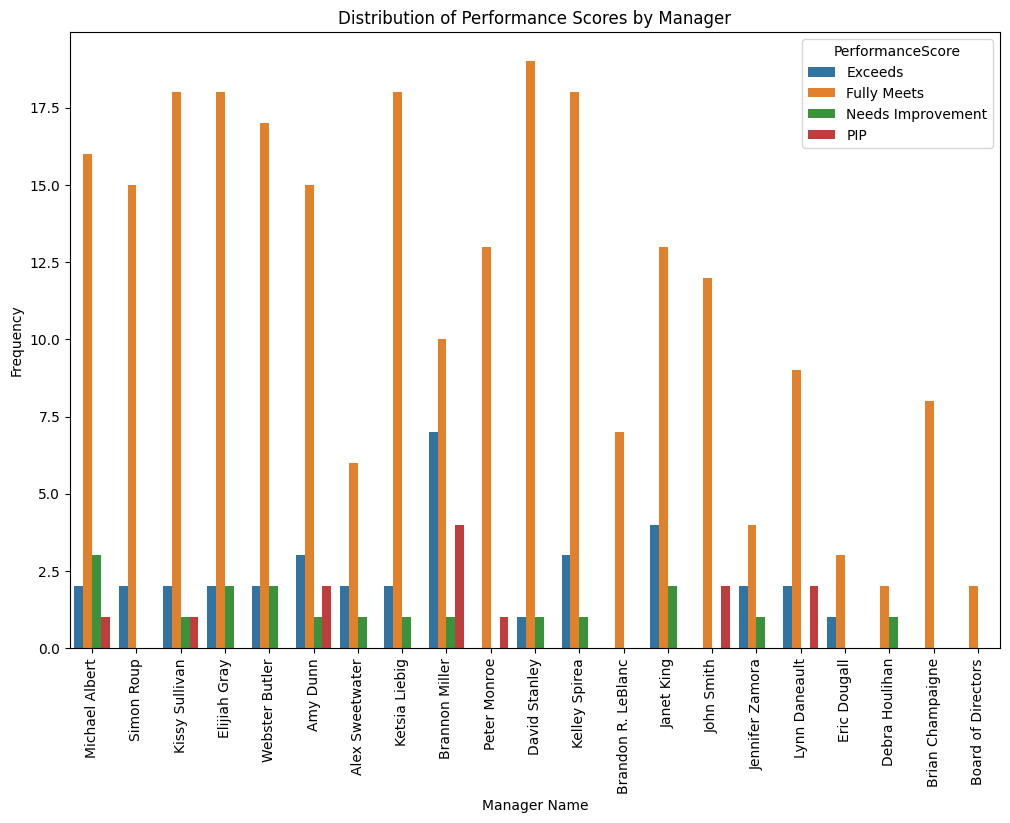

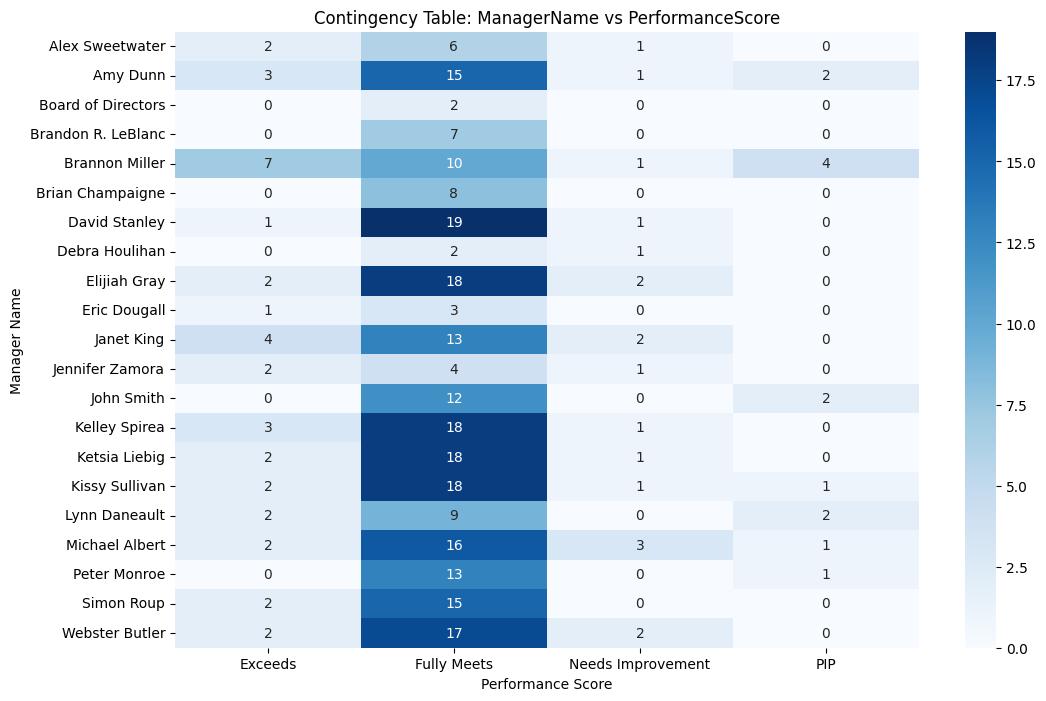

Chi-squared statistic: 67.00
p-value: 0.2494
There is no statistically significant association between ManagerName and PerformanceScore.


In [26]:
# Visualize the distribution of Performance Scores by ManagerName
plt.figure(figsize=(12, 8))
sns.countplot(x='ManagerName', hue='PerformanceScore', data=df)
plt.xlabel('Manager Name')
plt.ylabel('Frequency')
plt.title('Distribution of Performance Scores by Manager')
plt.xticks(rotation=90)
plt.show()

# Create a contingency table to analyze the relationship between ManagerName and PerformanceScore
contingency_table = pd.crosstab(df['ManagerName'], df['PerformanceScore'])

# Visualize the contingency table using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Performance Score')
plt.ylabel('Manager Name')
plt.title('Contingency Table: ManagerName vs PerformanceScore')
plt.show()

# Perform a chi-squared test to determine if there's a significant association between ManagerName and PerformanceScore
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-squared statistic: {chi2:.2f}')
print(f'p-value: {p:.4f}')

if p < 0.05:
    print('There is a statistically significant association between ManagerName and PerformanceScore.')
else:
    print('There is no statistically significant association between ManagerName and PerformanceScore.')

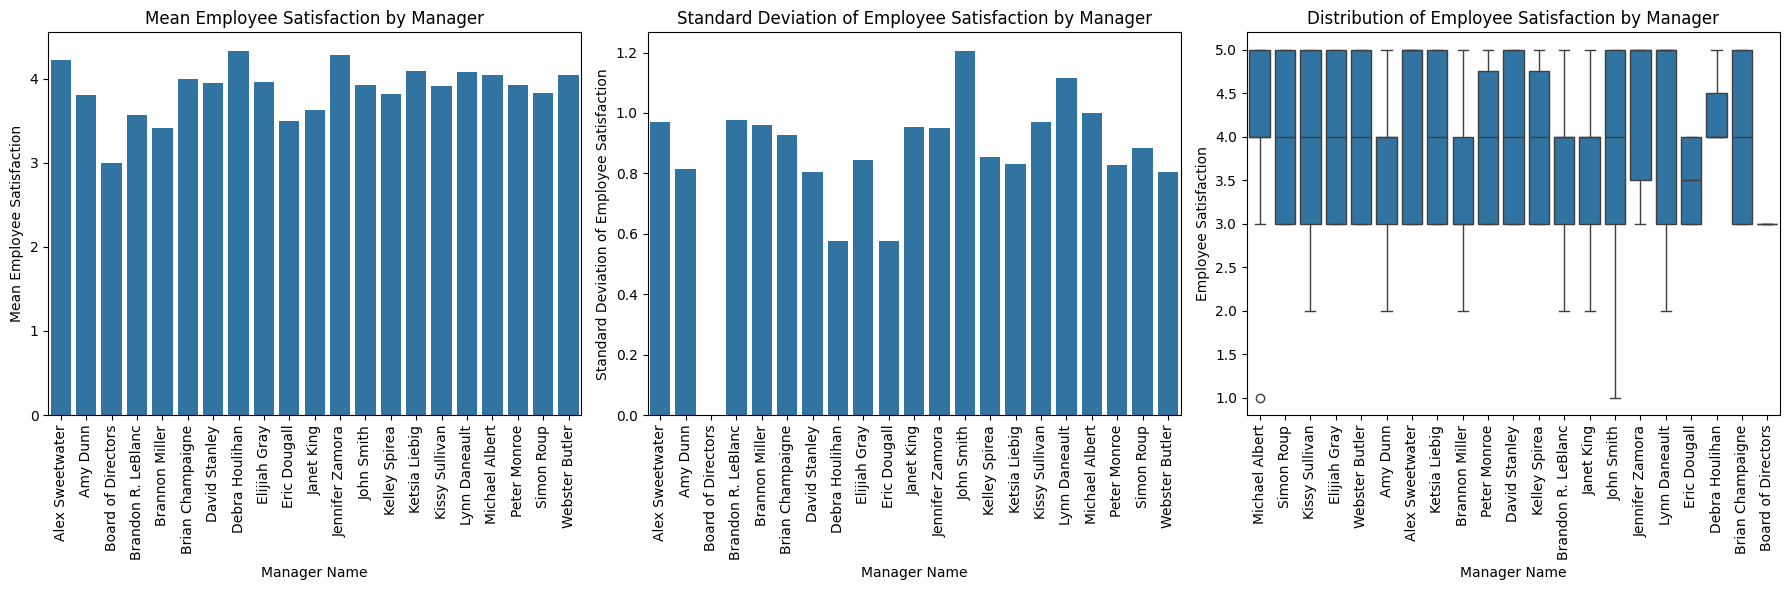

In [27]:
# Calculate the mean and standard deviation of EmpSatisfaction for each ManagerName
emp_satisfaction_by_manager = df.groupby('ManagerName')['EmpSatisfaction'].mean().reset_index()
emp_satisfaction_std_by_manager = df.groupby('ManagerName')['EmpSatisfaction'].std().reset_index()

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Mean EmpSatisfaction by ManagerName
sns.barplot(x='ManagerName', y='EmpSatisfaction', data=emp_satisfaction_by_manager, ax=axs[0])
axs[0].set_xlabel('Manager Name')
axs[0].set_ylabel('Mean Employee Satisfaction')
axs[0].set_title('Mean Employee Satisfaction by Manager')
axs[0].tick_params(axis='x', rotation=90)

# Plot 2: Standard Deviation of EmpSatisfaction by ManagerName
sns.barplot(x='ManagerName', y='EmpSatisfaction', data=emp_satisfaction_std_by_manager, ax=axs[1])
axs[1].set_xlabel('Manager Name')
axs[1].set_ylabel('Standard Deviation of Employee Satisfaction')
axs[1].set_title('Standard Deviation of Employee Satisfaction by Manager')
axs[1].tick_params(axis='x', rotation=90)

# Plot 3: Distribution of EmpSatisfaction by ManagerName
sns.boxplot(x='ManagerName', y='EmpSatisfaction', data=df, ax=axs[2])
axs[2].set_xlabel('Manager Name')
axs[2].set_ylabel('Employee Satisfaction')
axs[2].set_title('Distribution of Employee Satisfaction by Manager')
axs[2].tick_params(axis='x', rotation=90)

# Adjust the layout to avoid overlapping labels
plt.tight_layout()

plt.show()

Recruitment Sources and their counts:
RecruitmentSource
Indeed                     87
LinkedIn                   76
Google Search              49
Employee Referral          31
Diversity Job Fair         29
CareerBuilder              23
Website                    13
Other                       2
On-line Web application     1
Name: count, dtype: int64

Recruitment Sources as percentage:
RecruitmentSource
Indeed                     27.974277
LinkedIn                   24.437299
Google Search              15.755627
Employee Referral           9.967846
Diversity Job Fair          9.324759
CareerBuilder               7.395498
Website                     4.180064
Other                       0.643087
On-line Web application     0.321543
Name: proportion, dtype: float64


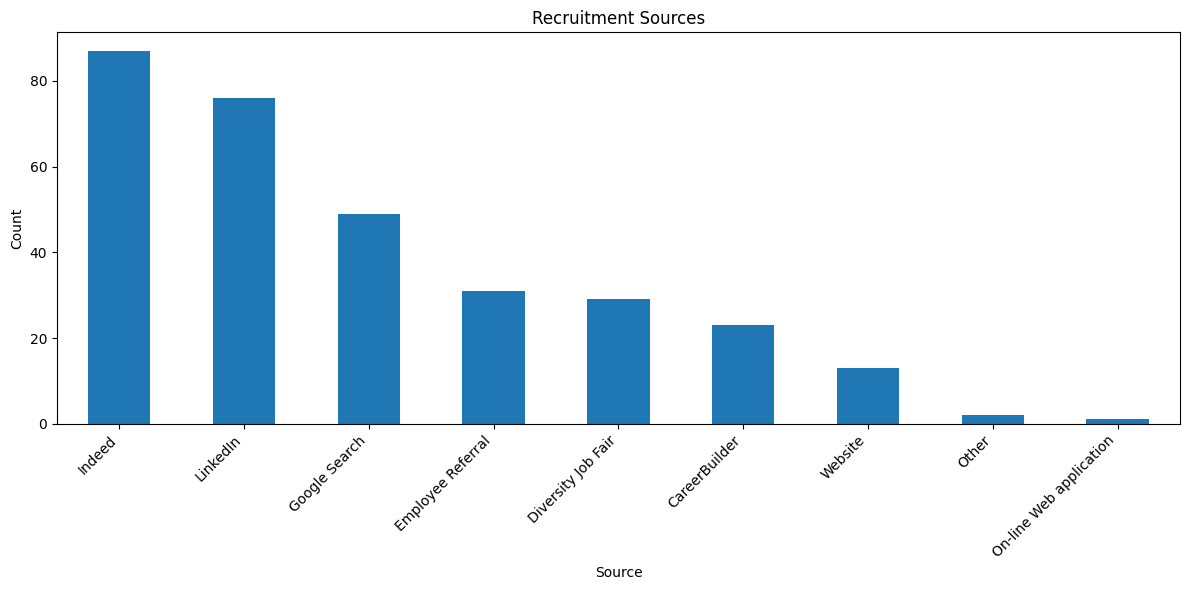

In [28]:
# Get the value counts of RecruitmentSource
recruitment_sources = df['RecruitmentSource'].value_counts()

# Display the results
print("Recruitment Sources and their counts:")
print(recruitment_sources)

# Display as a percentage
print("\nRecruitment Sources as percentage:")
print(df['RecruitmentSource'].value_counts(normalize=True) * 100)

plt.figure(figsize=(12, 6))
recruitment_sources.plot(kind='bar')
plt.title('Recruitment Sources')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [35]:
from datetime import datetime


# Step 1: Convert the 'DOB' column to datetime
def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%m/%d/%y')
    except:
        try:
            return pd.to_datetime(date_str, format='%m-%d-%Y')
        except:
            return pd.NaT  # Return Not a Time for any unparseable dates

df['DOB'] = df['DOB'].apply(parse_date)

# Step 2: Calculate age as of 2021
reference_date = pd.Timestamp('2021-12-31')  # You can adjust this date if needed

def calculate_age(born):
    if pd.isnull(born):
        return None
    return reference_date.year - born.year - ((reference_date.month, reference_date.day) < (born.month, born.day))

df['Age'] = df['DOB'].apply(calculate_age)

# Step 3: Handle any potential negative ages (for dates after 2021)
df.loc[df['Age'] < 0, 'Age'] = 0

# Print the first few rows to verify
print(df[['DOB', 'Age']].head())

         DOB  Age
0 1983-07-10   38
1 1975-05-05   46
2 1988-09-19   33
3 1988-09-27   33
4 1989-09-08   32


In [36]:
df['Age'].value_counts()

Age
0     42
38    21
35    21
42    19
34    19
33    18
37    16
40    14
32    14
36    13
51    12
47    12
44    11
48     9
45     9
41     9
46     9
43     8
39     8
52     7
49     7
31     5
30     3
29     3
50     2
Name: count, dtype: int64

In [37]:
def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%m/%d/%y')
    except:
        try:
            return pd.to_datetime(date_str, format='%m-%d-%Y')
        except:
            print(f"Failed to parse date: {date_str}")  # Debug print
            return pd.NaT

df['DOB'] = df['DOB'].apply(parse_date)

reference_date = pd.Timestamp('2021-12-31')

def calculate_age(born):
    if pd.isnull(born):
        print(f"Null birthdate encountered")  # Debug print
        return None
    age = reference_date.year - born.year - ((reference_date.month, reference_date.day) < (born.month, born.day))
    if age < 0:
        print(f"Negative age encountered: {born}")  # Debug print
    return age

df['Age'] = df['DOB'].apply(calculate_age)

df.loc[df['Age'] < 0, 'Age'] = 0

# Print summary statistics
print(df['Age'].value_counts())
print(f"Number of zero ages: {(df['Age'] == 0).sum()}")

# Print problematic entries
print("\nEntries with age 0:")
print(df[df['Age'] == 0][['DOB', 'Age']])

Negative age encountered: 2066-04-17 00:00:00
Negative age encountered: 2058-12-27 00:00:00
Negative age encountered: 2067-01-16 00:00:00
Negative age encountered: 2064-07-30 00:00:00
Negative age encountered: 2064-06-01 00:00:00
Negative age encountered: 2066-11-22 00:00:00
Negative age encountered: 2063-05-15 00:00:00
Negative age encountered: 2051-01-02 00:00:00
Negative age encountered: 2065-09-09 00:00:00
Negative age encountered: 2052-01-18 00:00:00
Negative age encountered: 2051-02-25 00:00:00
Negative age encountered: 2067-04-19 00:00:00
Negative age encountered: 2055-04-14 00:00:00
Negative age encountered: 2063-08-28 00:00:00
Negative age encountered: 2068-07-06 00:00:00
Negative age encountered: 2064-10-12 00:00:00
Negative age encountered: 2052-08-18 00:00:00
Negative age encountered: 2066-03-17 00:00:00
Negative age encountered: 2066-03-22 00:00:00
Negative age encountered: 2064-04-13 00:00:00
Negative age encountered: 2059-08-19 00:00:00
Negative age encountered: 2054-09-

In [38]:
def parse_date(date_str):
    try:
        dt = pd.to_datetime(date_str, format='%m/%d/%y')
        # If the year is after 2021, assume it's actually 100 years earlier
        if dt.year > 2021:
            dt = dt.replace(year=dt.year - 100)
        return dt
    except:
        try:
            return pd.to_datetime(date_str, format='%m-%d-%Y')
        except:
            print(f"Failed to parse date: {date_str}")  # Debug print
            return pd.NaT

df['DOB'] = df['DOB'].apply(parse_date)

reference_date = pd.Timestamp('2021-12-31')

def calculate_age(born):
    if pd.isnull(born):
        print(f"Null birthdate encountered")  # Debug print
        return None
    age = reference_date.year - born.year - ((reference_date.month, reference_date.day) < (born.month, born.day))
    return age

df['Age'] = df['DOB'].apply(calculate_age)

# Print summary statistics
print(df['Age'].value_counts())
print(f"Number of zero ages: {(df['Age'] == 0).sum()}")

# Print entries that were previously problematic
print("\nPreviously problematic entries:")
print(df.loc[df.index.isin([16, 21, 24, 25, 32, 35, 40, 41, 59, 61, 68, 69, 89, 98, 99, 112, 124, 131, 140, 142, 143, 150, 185, 201, 206, 225, 230, 244, 246, 257, 260, 263, 273, 277, 278, 279, 281, 282, 290, 296, 301, 304]), ['DOB', 'Age']])

Age
38    21
35    21
42    19
34    19
33    18
37    16
32    14
40    14
36    13
51    12
47    12
44    11
41     9
45     9
48     9
46     9
43     8
39     8
53     7
52     7
49     7
56     5
31     5
57     5
54     4
55     4
69     3
58     3
30     3
29     3
67     2
70     2
50     2
66     2
63     2
62     1
60     1
68     1
Name: count, dtype: int64
Number of zero ages: 0

Previously problematic entries:
           DOB  Age
16  1966-04-17   55
21  1958-12-27   63
24  1967-01-16   54
25  1964-07-30   57
32  1964-06-01   57
35  1966-11-22   55
40  1963-05-15   58
41  1951-01-02   70
59  1965-09-09   56
61  1952-01-18   69
68  1951-02-25   70
69  1967-04-19   54
89  1955-04-14   66
98  1963-08-28   58
99  1968-07-06   53
112 1964-10-12   57
124 1952-08-18   69
131 1966-03-17   55
140 1966-03-22   55
142 1964-04-13   57
143 1959-08-19   62
150 1954-09-21   67
185 1968-05-30   53
201 1967-06-03   54
206 1952-02-11   69
225 1961-06-19   60
230 1954-10-12   67
244 1964-01-

In [39]:
df['Age'].value_counts()

Age
38    21
35    21
42    19
34    19
33    18
37    16
32    14
40    14
36    13
51    12
47    12
44    11
41     9
45     9
48     9
46     9
43     8
39     8
53     7
52     7
49     7
56     5
31     5
57     5
54     4
55     4
69     3
58     3
30     3
29     3
67     2
70     2
50     2
66     2
63     2
62     1
60     1
68     1
Name: count, dtype: int64

In [40]:
def parse_date(date_str):
    if pd.isna(date_str):
        return pd.NaT
    
    date_formats = ['%m/%d/%Y', '%m-%d-%Y', '%m/%d/%y', '%m-%d-%y', '%d/%m/%Y', '%d-%m-%Y', '%d/%m/%y', '%d-%m-%y']
    
    for fmt in date_formats:
        try:
            dt = pd.to_datetime(date_str, format=fmt)
            # If the year is after 2021, assume it's actually 100 years earlier
            if dt.year > 2021:
                dt = dt.replace(year=dt.year - 100)
            return dt
        except:
            continue
    
    print(f"Failed to parse date: {date_str}")
    return pd.NaT

# Parse DateofHire and DateofTermination
df['DateofHire'] = df['DateofHire'].apply(parse_date)
df['DateofTermination'] = df['DateofTermination'].apply(parse_date)

# Define reference date
reference_date = pd.Timestamp('2021-04-30')

# Calculate Tenure
def calculate_tenure(row):
    if pd.isna(row['DateofHire']):
        return None
    
    if row['Termd'] == 1 and not pd.isna(row['DateofTermination']):
        tenure = (row['DateofTermination'] - row['DateofHire']).days / 365.25
    else:
        tenure = (reference_date - row['DateofHire']).days / 365.25
    
    return max(tenure, 0)  # Ensure tenure is not negative

df['Tenure'] = df.apply(calculate_tenure, axis=1)

# Print summary statistics
print(df['Tenure'].describe())

# Print a few sample rows to verify
print("\nSample rows:")
print(df[['DateofHire', 'DateofTermination', 'Termd', 'Tenure']].sample(10))

# Check for any remaining issues
print("\nRows with NaN Tenure:")
print(df[df['Tenure'].isna()][['DateofHire', 'DateofTermination', 'Termd', 'Tenure']])

print("\nRows with zero Tenure:")
print(df[df['Tenure'] == 0][['DateofHire', 'DateofTermination', 'Termd', 'Tenure']])

count    311.000000
mean       6.267610
std        2.800746
min        0.071184
25%        4.472279
50%        6.581793
75%        7.811088
max       15.304586
Name: Tenure, dtype: float64

Sample rows:
    DateofHire DateofTermination  Termd    Tenure
24  2011-01-10        2014-04-04      1  3.230664
133 2012-02-20               NaT      0  9.190965
215 2011-07-05        2015-09-15      1  4.197125
0   2011-07-05               NaT      0  9.820671
105 2012-04-02        2015-06-25      1  3.227926
5   2012-01-09               NaT      0  9.305955
100 2015-03-30               NaT      0  6.086242
180 2013-11-11               NaT      0  7.466119
179 2013-11-11               NaT      0  7.466119
159 2012-07-09               NaT      0  8.807666

Rows with NaN Tenure:
Empty DataFrame
Columns: [DateofHire, DateofTermination, Termd, Tenure]
Index: []

Rows with zero Tenure:
Empty DataFrame
Columns: [DateofHire, DateofTermination, Termd, Tenure]
Index: []


In [41]:
df['Tenure'].value_counts()

Tenure
6.086242     11
6.584531     10
6.316222      8
6.469541      8
7.581109      8
7.811088      8
7.466119      7
6.967830      7
6.814511      7
7.696099      6
9.305955      5
7.312799      5
7.197810      5
6.201232      5
9.190965      4
4.815880      3
8.960986      3
8.826831      3
9.820671      3
6.699521      3
9.075975      3
10.072553     3
10.302533     3
4.832307      2
4.202601      2
9.478439      2
6.986995      2
2.108145      2
4.027379      2
9.420945      2
12.314853     2
4.574949      2
7.964408      2
8.079398      2
8.309377      2
8.481862      2
7.082820      2
9.152635      2
4.479124      1
4.443532      1
1.724846      1
5.563313      1
1.407255      1
13.483915     1
7.052704      1
0.731006      1
6.529774      1
6.965092      1
4.668036      1
0.071184      1
0.596851      1
5.043121      1
5.349760      1
3.846680      1
4.309377      1
4.197125      1
1.415469      1
8.273785      1
3.832991      1
4.969199      1
1.125257      1
9.916496      1
4

In [42]:
def parse_date(date_str):
    if pd.isna(date_str):
        return pd.NaT
    
    date_formats = ['%m/%d/%Y', '%m-%d-%Y', '%m/%d/%y', '%m-%d-%y', '%d/%m/%Y', '%d-%m-%Y', '%d/%m/%y', '%d-%m-%y']
    
    for fmt in date_formats:
        try:
            dt = pd.to_datetime(date_str, format=fmt)
            # If the year is after 2021, assume it's actually 100 years earlier
            if dt.year > 2021:
                dt = dt.replace(year=dt.year - 100)
            return dt
        except:
            continue
    
    print(f"Failed to parse date: {date_str}")
    return pd.NaT

# Parse LastPerformanceReview_Date if it hasn't been parsed already
if df['LastPerformanceReview_Date'].dtype == 'object':
    df['LastPerformanceReview_Date'] = df['LastPerformanceReview_Date'].apply(parse_date)

# Ensure DateofTermination is parsed (in case it wasn't done in the previous step)
if df['DateofTermination'].dtype == 'object':
    df['DateofTermination'] = df['DateofTermination'].apply(parse_date)

# Define reference date
reference_date = pd.Timestamp('2021-04-30')

# Calculate LastPerformanceReview_Days
def calculate_review_days(row):
    if pd.isna(row['LastPerformanceReview_Date']):
        return None
    
    if row['Termd'] == 1 and not pd.isna(row['DateofTermination']):
        days = (row['DateofTermination'] - row['LastPerformanceReview_Date']).days
    else:
        days = (reference_date - row['LastPerformanceReview_Date']).days
    
    return max(days, 0)  # Ensure the number of days is not negative

df['LastPerformanceReview_Days'] = df.apply(calculate_review_days, axis=1)

# Print summary statistics
print(df['LastPerformanceReview_Days'].describe())

# Print a few sample rows to verify
print("\nSample rows:")
print(df[['LastPerformanceReview_Date', 'DateofTermination', 'Termd', 'LastPerformanceReview_Days']].sample(10))

# Check for any remaining issues
print("\nRows with NaN LastPerformanceReview_Days:")
print(df[df['LastPerformanceReview_Days'].isna()][['LastPerformanceReview_Date', 'DateofTermination', 'Termd', 'LastPerformanceReview_Days']])

print("\nRows with zero LastPerformanceReview_Days:")
print(df[df['LastPerformanceReview_Days'] == 0][['LastPerformanceReview_Date', 'DateofTermination', 'Termd', 'LastPerformanceReview_Days']])

count    311.000000
mean     609.829582
std      312.773215
min        0.000000
25%      295.000000
50%      807.000000
75%      829.500000
max      849.000000
Name: LastPerformanceReview_Days, dtype: float64

Sample rows:
    LastPerformanceReview_Date DateofTermination  Termd  \
63                  2019-02-27               NaT      0   
110                 2019-02-18               NaT      0   
49                  2012-05-03        2013-01-07      1   
231                 2015-03-30        2016-01-15      1   
65                  2016-04-02        2016-06-08      1   
54                  2019-01-14               NaT      0   
1                   2016-02-24        2016-06-16      1   
197                 2019-02-25               NaT      0   
78                  2019-01-15               NaT      0   
114                 2019-02-07               NaT      0   

     LastPerformanceReview_Days  
63                          793  
110                         802  
49                       

In [43]:
df['LastPerformanceReview_Days'].value_counts()


LastPerformanceReview_Days
837    18
802    12
830    10
795     9
834     8
823     8
844     7
820     6
826     6
798     6
821     6
809     6
813     5
793     5
806     5
0       5
847     5
822     5
819     5
808     4
816     4
829     4
799     4
827     4
836     4
833     4
841     4
840     4
814     4
849     4
848     3
835     3
843     3
33      3
801     3
828     3
805     3
807     3
42      2
824     2
58      2
598     2
48      2
178     2
390     2
812     2
794     2
80      2
54      2
792     2
145     2
168     2
103     2
182     1
63      1
270     1
132     1
381     1
291     1
62      1
483     1
77      1
284     1
175     1
440     1
25      1
530     1
221     1
266     1
106     1
22      1
304     1
6       1
194     1
53      1
463     1
204     1
815     1
361     1
372     1
7       1
4       1
427     1
303     1
47      1
187     1
81      1
411     1
119     1
41      1
314     1
280     1
398     1
240     1
31      1
637     1
222     1
40 

In [44]:
# List of columns to drop
columns_to_drop = [
    'Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
    'EmpStatusID', 'DeptID', 'PerfScoreID', 'DateofHire', 'DateofTermination',
    'FromDiversityJobFairID', 'PositionID', 'TermReason', 'ManagerID',
    'LastPerformanceReview_Date', 'DOB','State', 'Zip', 'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'EmploymentStatus' 
]

# Create new dataframe by dropping specified columns
df = df.drop(columns=columns_to_drop)

In [45]:
from sklearn.preprocessing import LabelEncoder


# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

print("Identified categorical columns:")
print(categorical_columns.tolist())

# Create a LabelEncoder object
le = LabelEncoder()

# Function to apply label encoding and handle unknown categories
def label_encode(df, column):
    df[column] = df[column].astype(str)  # Convert to string type to handle potential non-string categories
    le.fit(df[column].astype(str))
    df[column + '_encoded'] = le.transform(df[column].astype(str))
    # Create a mapping dictionary
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"\nEncoding for {column}:")
    print(mapping)
    return df

# Apply label encoding to each categorical column
for col in categorical_columns:
    df = label_encode(df, col)


# Remove original categorical columns
df = df.drop(columns=categorical_columns)

Identified categorical columns:
['Position', 'Sex', 'MaritalDesc', 'Department', 'ManagerName', 'RecruitmentSource', 'PerformanceScore']

Encoding for Position:
{'Accountant I': 0, 'Administrative Assistant': 1, 'Area Sales Manager': 2, 'BI Developer': 3, 'BI Director': 4, 'CIO': 5, 'Data Analyst': 6, 'Data Analyst ': 7, 'Data Architect': 8, 'Database Administrator': 9, 'Director of Operations': 10, 'Director of Sales': 11, 'Enterprise Architect': 12, 'IT Director': 13, 'IT Manager - DB': 14, 'IT Manager - Infra': 15, 'IT Manager - Support': 16, 'IT Support': 17, 'Network Engineer': 18, 'President & CEO': 19, 'Principal Data Architect': 20, 'Production Manager': 21, 'Production Technician I': 22, 'Production Technician II': 23, 'Sales Manager': 24, 'Senior BI Developer': 25, 'Shared Services Manager': 26, 'Software Engineer': 27, 'Software Engineering Manager': 28, 'Sr. Accountant': 29, 'Sr. DBA': 30, 'Sr. Network Engineer': 31}

Encoding for Sex:
{'F': 0, 'M ': 1}

Encoding for Marita

In [46]:
# Separating features(X) and target(y)
X = df.drop('Termd', axis=1)
y = df['Termd']

In [47]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def auto_scale(df):
    def decide_scaler(column):
        # Check for skewness
        skewness = column.skew()
        
        # Check for outliers using IQR method
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1
        outlier_range = 1.5 * IQR
        outliers = ((column < (Q1 - outlier_range)) | (column > (Q3 + outlier_range))).sum()
        
        # If data is highly skewed or has many outliers, use MinMaxScaler
        if abs(skewness) > 1 or outliers > 0.1 * len(column):
            return MinMaxScaler()
        else:
            return StandardScaler()
    
    scaled_df = df.copy()
    
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            scaler = decide_scaler(df[column])
            scaled_df[column] = scaler.fit_transform(df[column].values.reshape(-1, 1))
    
    return scaled_df

# Usage
X = auto_scale(X)

In [48]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Fit all models
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 12.43it/s]

[LightGBM] [Info] Number of positive: 82, number of negative: 166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 396
[LightGBM] [Info] Number of data points in the train set: 248, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.330645 -> initscore=-0.705269
[LightGBM] [Info] Start training from score -0.705269
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,0.05
BaggingClassifier,1.00,1.00,1.00,1.00,0.02
XGBClassifier,1.00,1.00,1.00,1.00,1.20
SGDClassifier,1.00,1.00,1.00,1.00,0.01
RidgeClassifierCV,1.00,1.00,1.00,1.00,0.02
RidgeClassifier,1.00,1.00,1.00,1.00,0.03
RandomForestClassifier,1.00,1.00,1.00,1.00,0.14
QuadraticDiscriminantAnalysis,1.00,1.00,1.00,1.00,0.02
Perceptron,1.00,1.00,1.00,1.00,0.02


In [49]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
# Initialize and train the XGBClassifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [51]:
# Predict probabilities
y_pred_proba = xgb_model.predict_proba(X_test)
y_pred = xgb_model.predict(X_test)

In [52]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        22

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



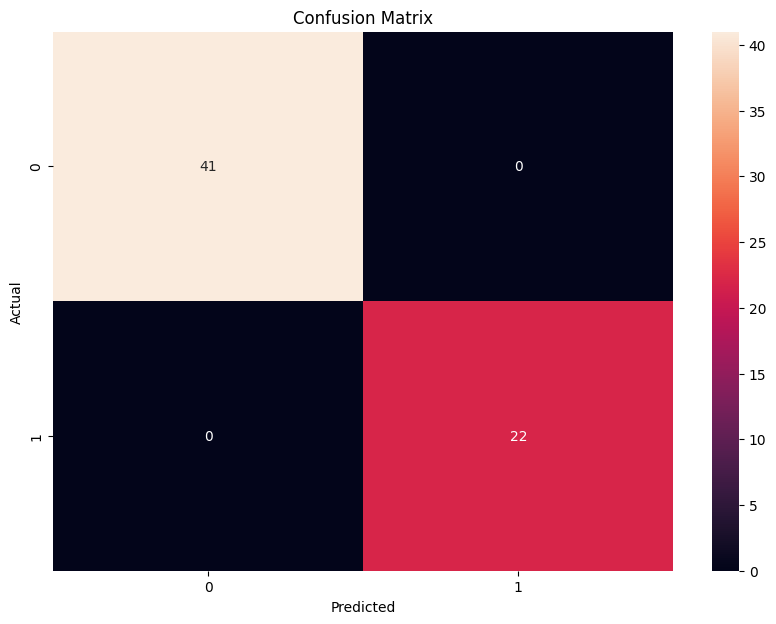

In [53]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

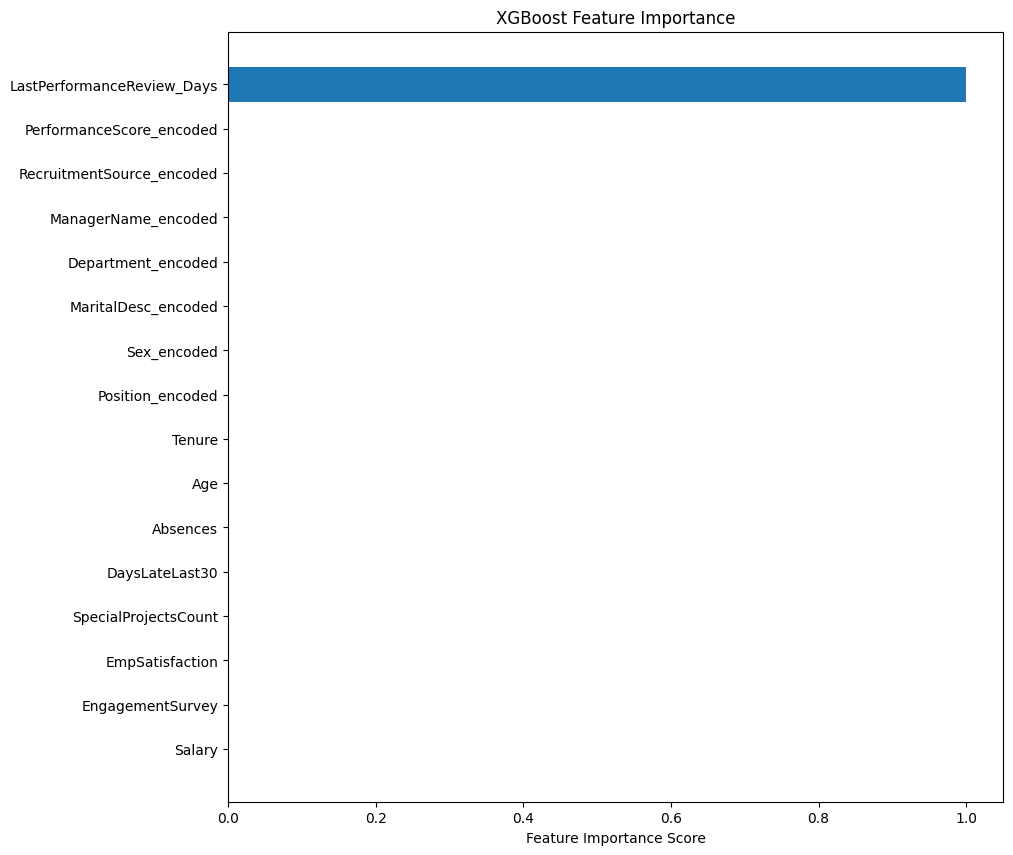

In [54]:
# Feature Importances
feature_importance = xgb_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig, ax = plt.subplots(figsize=(10, 10))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title("XGBoost Feature Importance")
plt.xlabel("Feature Importance Score")
plt.show()

In [55]:
df = df.drop(columns='LastPerformanceReview_Days')

In [56]:
df.columns

Index(['Salary', 'Termd', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'DaysLateLast30', 'Absences', 'Age', 'Tenure',
       'Position_encoded', 'Sex_encoded', 'MaritalDesc_encoded',
       'Department_encoded', 'ManagerName_encoded',
       'RecruitmentSource_encoded', 'PerformanceScore_encoded'],
      dtype='object')

In [57]:
X = df.drop('Termd', axis=1)
y = df['Termd']

In [58]:
X = auto_scale(X)

In [59]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [61]:
# Predict probabilities
y_pred_proba = xgb_model.predict_proba(X_test)
y_pred = xgb_model.predict(X_test)

In [62]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        41
           1       0.95      0.82      0.88        22

    accuracy                           0.92        63
   macro avg       0.93      0.90      0.91        63
weighted avg       0.92      0.92      0.92        63



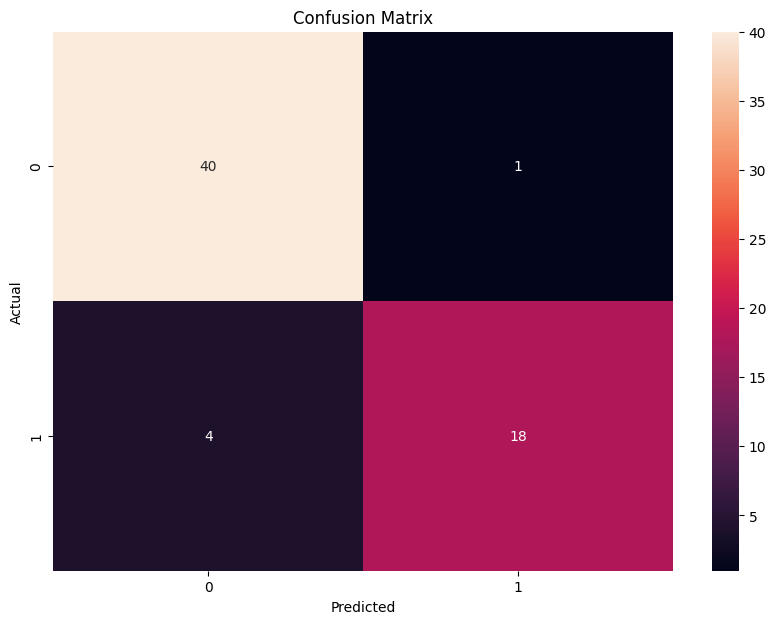

In [63]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

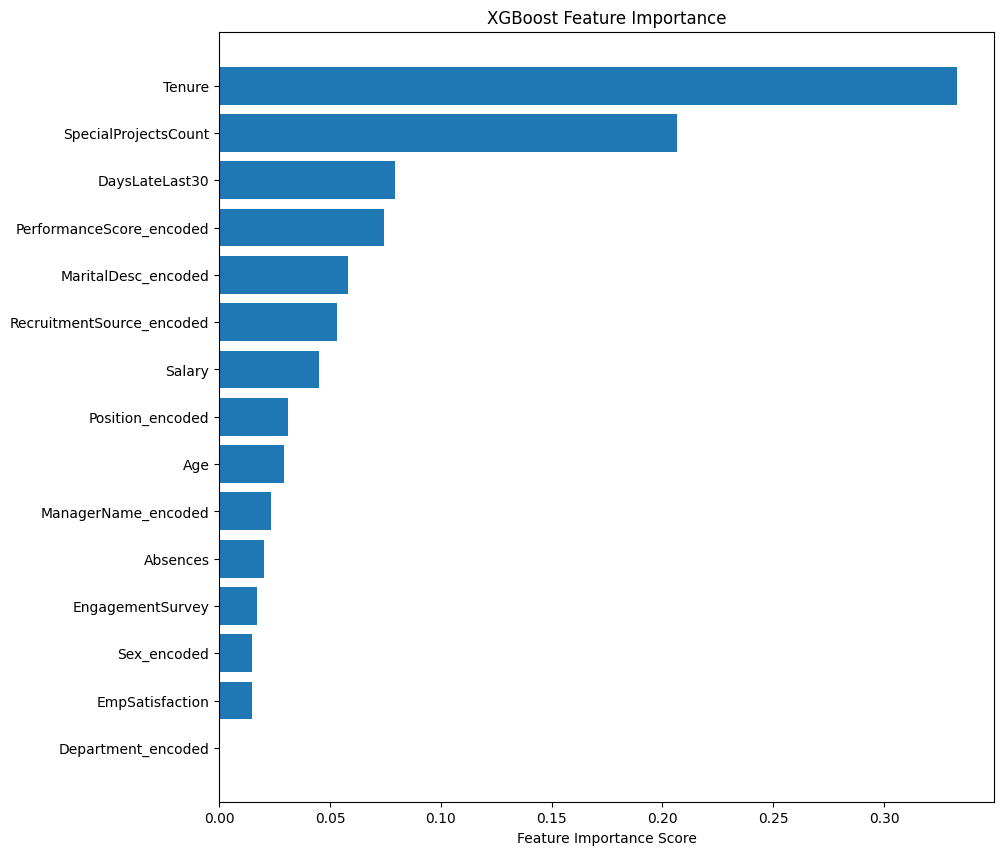

In [64]:
# Feature Importances
feature_importance = xgb_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig, ax = plt.subplots(figsize=(10, 10))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title("XGBoost Feature Importance")
plt.xlabel("Feature Importance Score")
plt.show()